### Brecha de género en los poderes del estado

De acuerdo con ONU (2019) las mujeres ganan 17% menos que los varones por el mismo trabajo en Latinoamérica. La brecha salarial de género responde directamente a la forma en que hombres y mujeres se organizan a lo largo de sus ciclos de vida, es decir a cómo cada uno y una asigna su tiempo y recursos durante toda su vida. Así, la brecha salarial se explica porque las mujeres, en promedio, distribuyen su tiempo y recursos de forma distinta a la forma en como lo hacen los hombres. Ello a su vez está marcado por las normas sociales vigentes que definen la división sexual del trabajo aún en la actualidad (Rubin et al., 2009; Monzón & Fuertes, 2014). Por ejemplo el monto de negociación salarial se ve afectado por este sesgo, generalmente los varones negocian montos superiores a las mujeres, quienes tambien debido al sesgo de género negocian salarios más bajos que los hombres. Las intituciones no pueden seguir perpetuando estos sesgos ya que acrecentan la desigualdad salarial. Por ello en este ejercicio vamos a conocer cuales son las condiciones de los empleados y empleadas en el Congreso de la República en el Año 2019. 

## Importar librerias

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.exceptions import YellowbrickValueError
from yellowbrick.cluster import InterclusterDistance
from sklearn.decomposition import TruncatedSVD
#Metrics libraries
from sklearn import cluster, mixture
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

C:\Users\pilar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Importar el dataset

In [2]:
dataset=pd.read_csv('https://raw.githubusercontent.com/PilarHidalgo/Clustering_Hackaton-UP/master/congreso2019_c.csv', delimiter=';')
#dataset=pd.read_csv('https://raw.githubusercontent.com/PilarHidalgo/Clustering_Hackaton-UP/master/poderjudicial2019.csv', delimiter=';')

In [3]:
dataset.columns

Index(['REGIMEN_LABORAL', 'CARGO', 'REMUNERACION MENSUAL', 'BENEFICIOS',
       'female', 'male'],
      dtype='object')

In [4]:
dataset.describe()

,REGIMEN_LABORAL,CARGO,REMUNERACION MENSUAL,BENEFICIOS,female,male
count,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000
mean,2.721515,3.375994,4916.283263,48.057569,0.435817,0.564183
std,0.698732,1.124952,3017.574909,298.221738,0.495868,0.495868
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2598.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,4390.000000,0.000000,0.000000,1.000000
75%,3.000000,4.000000,6409.000000,93.000000,1.000000,1.000000
max,8.000000,6.000000,19754.800000,8184.000000,1.000000,1.000000


Ahora vamos a dividir el dataset de varones y mujeres

In [5]:
dataset_V=dataset[dataset['male']==1]
dataset_M=dataset[dataset['female']==1]

In [6]:
X_v=dataset_V.iloc[:, [0,1,2,3]].values # Nota solo tomar los datos numericos
X_m=dataset_M.iloc[:, [0,1,2,3]].values # puede ser tambien edad: [2,3,4]

## Descomposicion de componentes

In [7]:
from sklearn.datasets import make_blobs
from yellowbrick.cluster import InterclusterDistance

En este ejemplo tenemos más de 2 variables en estudio, por ello vamos a ajustar nuestro conjunto de datos en 2 dimensiones, utilizaremos como base 4 grupos para cada conjunto de datos de modo que nos permita visualizar la distancia entre cada uno

C:\Users\pilar\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


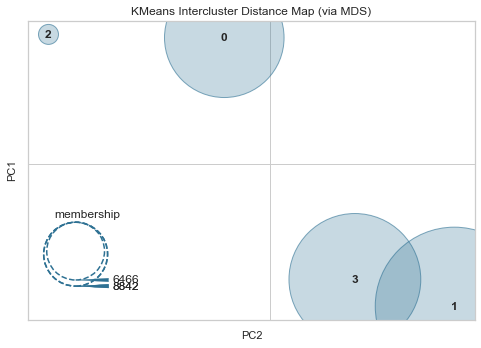

In [8]:
visualizer = InterclusterDistance(cluster.KMeans(4))#Can change k
visualizer.fit(X_v) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [13]:
svd = TruncatedSVD(n_components=2,n_iter=7)
normalizer = Normalizer(copy=False)#Since LSA/SVD results are not normalized, we have to redo the normalization.
lsa = make_pipeline(svd, normalizer)
X_M = svd.fit_transform(X_m)
X_V= svd.fit_transform(X_v)

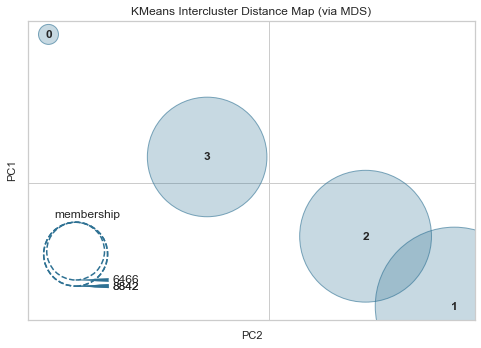

In [14]:
visualizer = InterclusterDistance(cluster.KMeans(4))#Can change k
visualizer.fit(X_V) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

Luego de la "Descomposición de componentes", observamos que los gripos se han alejado,esto quiere decir que estan mejor definidos.Para mayor información acerca de la Descomposición de componentes puedes visitar esta página: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

Ahora si aplicamos el modelo
## Aplicando K-means

In [15]:
from sklearn.cluster import KMeans
wcss_V= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_V)
    wcss_V.append(kmeans.inertia_)
wcss_M = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_M)
    wcss_M.append(kmeans.inertia_)

## Identificando el número de clusters correcto

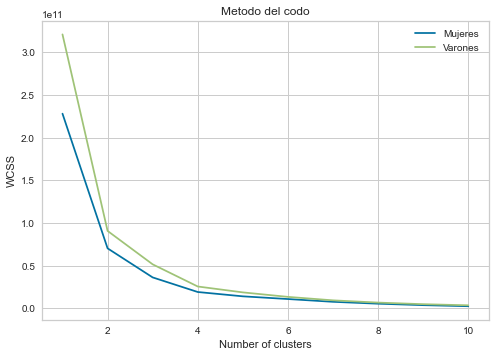

In [17]:
plt.plot(range(1, 11), wcss_M, label='Mujeres')   
plt.plot(range(1, 11), wcss_V, label='Varones')
plt.title('Metodo del codo')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

Al parecer ambos dataset, contienen 3 grupos diferenciados, de acuerdo al grafico del "codo"

## El modelo correcto

In [18]:
#Mujeres
kmeansM = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_M = kmeansM.fit_predict(X_M)
#Varones
kmeansV = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_V = kmeansV.fit_predict(X_V)

## Visualicemos ahora si

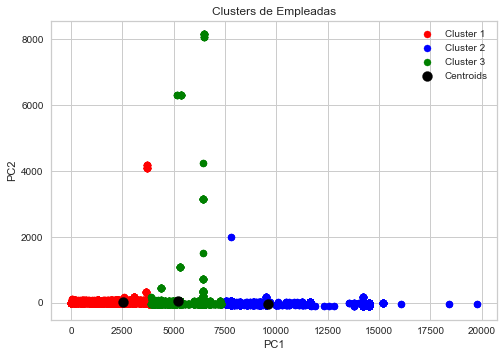

In [19]:
#Mujeres
plt.scatter(X_M[y_kmeans_M == 0, 0], X_M[y_kmeans_M== 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_M[y_kmeans_M == 1, 0], X_M[y_kmeans_M == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_M[y_kmeans_M == 2, 0], X_M[y_kmeans_M == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeansM.cluster_centers_[:, 0], kmeansM.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters de Empleadas')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

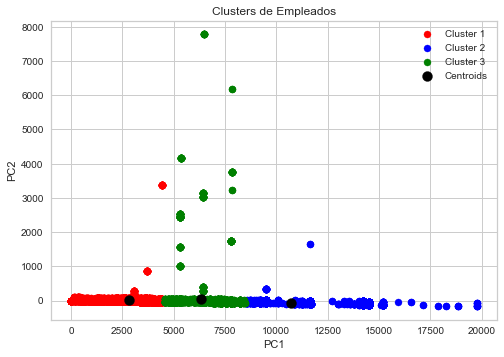

In [20]:
#Varones
plt.scatter(X_V[y_kmeans_V == 0, 0], X_V[y_kmeans_V== 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_V[y_kmeans_V == 1, 0], X_V[y_kmeans_V == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_V[y_kmeans_V == 2, 0], X_V[y_kmeans_V == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeansV.cluster_centers_[:, 0], kmeansV.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters de Empleados')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Analicemos los clusters

In [21]:
centroids_M = kmeansM.cluster_centers_
original_space_centroids = svd.inverse_transform(centroids_M)
order_centroids = original_space_centroids.argsort()[:, ::-1]
#terms = vectorizer.get_feature_names()
for i in range(3):
    print("Cluster %d:" %i, end='')
    for ind in original_space_centroids[i, :10]:
        print(' %s' % ind, end='')
        print()

Cluster 0: 1.0354456701812143
 1.1403656734482268
 2516.958929316216
 33.11019894160436
Cluster 1: 3.9089505909167337
 4.286834393489109
 9595.625578226674
 39.622833231503755
Cluster 2: 2.1437636727374887
 2.3630472078694966
 5200.448402432631
 78.20934706337758


In [22]:
centroids_V = kmeansV.cluster_centers_
original_space_centroids = svd.inverse_transform(centroids_V)
order_centroids = original_space_centroids.argsort()[:, ::-1]
#terms = vectorizer.get_feature_names()
for i in range(3):
    print("Cluster %d:" %i, end='')
    for ind in original_space_centroids[i, :10]:
        print(' %s' % ind, end='')
        print()

Cluster 0: 1.1624632576831142
 1.2785635359772856
 2834.418337141918
 29.244985623462686
Cluster 1: 4.3595884399280616
 4.778259172466939
 10716.145889940768
 31.16758339493991
Cluster 2: 2.6055272457924645
 2.874120469813269
 6309.923330972706
 104.79322936680097


La brecha en los clusters es evidente, más aun en lo que corresponden a puestos más altos (1-6). Mujeres en puestos altos ganan 10.45% menos que los varones (puesto 4 equivalente a asesores, administradores y jefes de área).

### Fuente:
https://www.defensoria.gob.pe/deunavezportodas/wp-content/uploads/2019/11/Brecha-salarial-por-razones-de-genero-2019-DP.pdf
http://www.congreso.gob.pe/Portal_Transparencia
https://www.transparencia.gob.pe/enlaces/pte_transparencia_enlaces.aspx?id_entidad=10051#.X2Ru7WhKhPY